In [44]:
#import of the libs
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error
from sklearn.tree import export_graphviz
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from graphviz import Source
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Procesamiento de la data

In [45]:
songs_df = pd.read_csv('songs.csv')
songs_df.head()

#obtener las variables numéricas
numerical_cols = [cname for cname in songs_df.columns if songs_df[cname].dtype in ['int64', 'float64']]
numerical_cols.remove('mode')

#obtener las variables categoricas
categorical_cols = [cname for cname in songs_df.columns if songs_df[cname].dtype in ["object", "bool"]]
categorical_cols.append('mode')



# Arbol de regresiones

In [46]:
#create the model
regressorTree = DecisionTreeRegressor()
PregressorTree = DecisionTreeRegressor(criterion='poisson')
abosluteTree = DecisionTreeRegressor(criterion='absolute_error')
friedmanTree = DecisionTreeRegressor(criterion='friedman_mse')
#preprocess the data
songs_df = songs_df[numerical_cols]
y = songs_df['popularity']
X = songs_df.drop('popularity',axis=1)
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size = 0.3)



In [47]:
#train the model
regressorTree.fit(X_train, y_train)
PregressorTree.fit(X_train, y_train)
abosluteTree.fit(X_train, y_train)
friedmanTree.fit(X_train, y_train)
#see the model 


DecisionTreeRegressor(criterion='friedman_mse')

In [48]:
# test the model
predicted = regressorTree.predict(X_test)

# on the test or hold-out set
print("metrics for normal regressor")
print(f"RMSE {root_mean_squared_error(y_test,predicted)}")
print(f"MSE {mean_squared_error(y_test,predicted)}")
print(f"MAE {mean_absolute_error(y_test,predicted)}")
print(f"R2 SCORE {r2_score(y_test,predicted)}")
print()
predicted_poisson = PregressorTree.predict(X_test)
print("metrics for poissson regressor")
print(f"RMSE {root_mean_squared_error(y_test,predicted_poisson)}")
print(f"MSE {mean_squared_error(y_test,predicted_poisson)}")
print(f"MAE {mean_absolute_error(y_test,predicted_poisson)}")
print(f"R2 SCORE {r2_score(y_test,predicted_poisson)}")
print()
predicted_abosulte = abosluteTree.predict(X_test)
print("metrics for absolute error regressor")
print(f"RMSE {root_mean_squared_error(y_test,predicted_abosulte)}")
print(f"MSE {mean_squared_error(y_test,predicted_abosulte)}")
print(f"MAE {mean_absolute_error(y_test,predicted_abosulte)}")
print(f"R2 SCORE {r2_score(y_test,predicted_abosulte)}")
print()
predicted_fried = friedmanTree.predict(X_test)
print("metrics for friedman_mse regressor")
print(f"RMSE {root_mean_squared_error(y_test,predicted_fried)}")
print(f"MSE {mean_squared_error(y_test,predicted_fried)}")
print(f"MAE {mean_absolute_error(y_test,predicted_fried)}")
print(f"R2 SCORE {r2_score(y_test,predicted_fried)}")

metrics for normal regressor
RMSE 29.32343346199418
MSE 859.86375
MAE 19.285833333333333
R2 SCORE -0.8264923179727208

metrics for poissson regressor
RMSE 28.613263977794684
MSE 818.7188754629628
MAE 19.384194444444443
R2 SCORE -0.7390938234253583

metrics for absolute error regressor
RMSE 30.543957394766863
MSE 932.9333333333333
MAE 19.89
R2 SCORE -0.9817041554711627

metrics for friedman_mse regressor
RMSE 29.602195864496267
MSE 876.29
MAE 19.446666666666665
R2 SCORE -0.8613843801605958


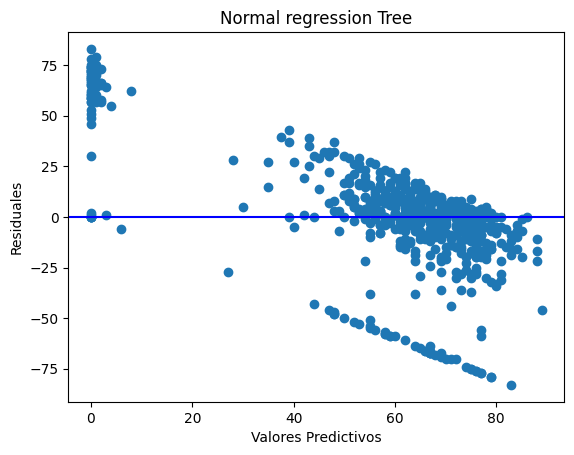

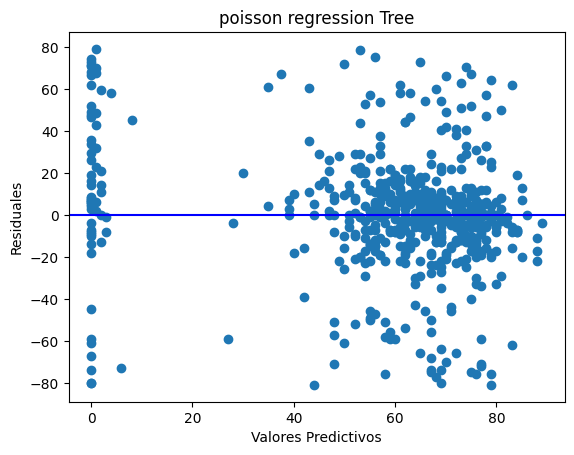

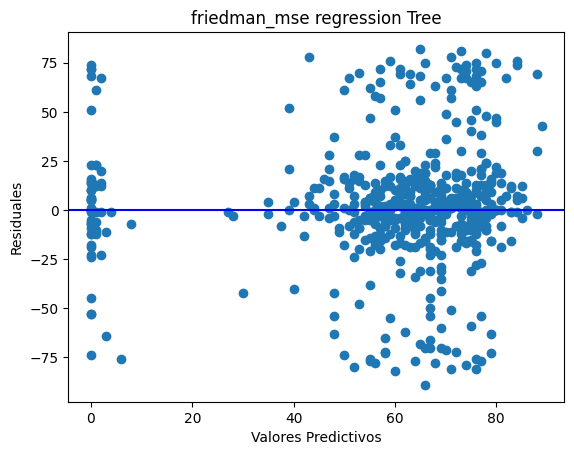

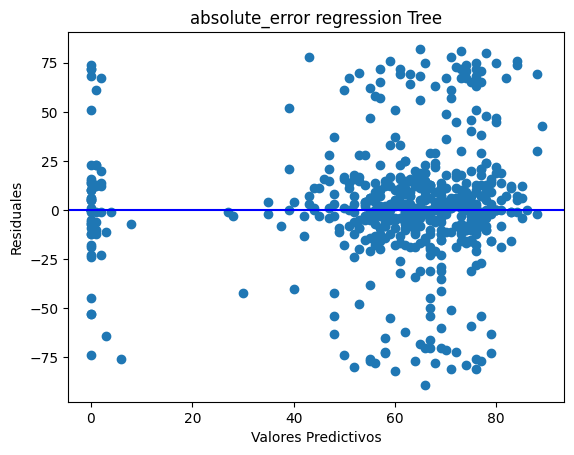

In [49]:
#residuales
residuals=y_test- predicted
plt.scatter(predicted,residuals)
plt.axhline(0,color='blue')
plt.xlabel('Valores Predictivos')
plt.ylabel('Residuales')
plt.title('Normal regression Tree')
plt.show()

plt.scatter(predicted,(y_test - predicted_poisson))
plt.axhline(0,color='blue')
plt.xlabel('Valores Predictivos')
plt.ylabel('Residuales')
plt.title('poisson regression Tree')
plt.show()

plt.scatter(predicted,(y_test - predicted_abosulte)) 
plt.axhline(0,color='blue')
plt.xlabel('Valores Predictivos')
plt.ylabel('Residuales')
plt.title('friedman_mse regression Tree')
plt.show()

plt.scatter(predicted,(y_test - predicted_abosulte)) 
plt.axhline(0,color='blue')
plt.xlabel('Valores Predictivos')
plt.ylabel('Residuales')
plt.title('absolute_error regression Tree')
plt.show()

# Clasification tree

In [50]:
# crear las categorias	por cuartiles para poco popular, popular, muy popular correspondiente a 0,1,2

p25 = songs_df['popularity'].quantile(0.25)
p75 = songs_df['popularity'].quantile(0.75)

songs_df['popularityCategory'] = pd.cut(songs_df['popularity'], bins=[0, p25, p75, float('inf')],
                               labels=[0,1,2], right=False)

# drop population column since is not in use anymore
songs_df = songs_df.drop('popularity',axis=1)
print(songs_df.head())

   duration_ms  year  danceability  energy  key  loudness  speechiness  \
0       211160  2000         0.751   0.834    1    -5.444       0.0437   
1       167066  1999         0.434   0.897    0    -4.918       0.0488   
2       250546  1999         0.529   0.496    7    -9.007       0.0290   
3       224493  2000         0.551   0.913    0    -4.063       0.0466   
4       200560  2000         0.614   0.928    8    -4.806       0.0516   

   acousticness  instrumentalness  liveness  valence    tempo  \
0        0.3000          0.000018    0.3550    0.894   95.053   
1        0.0103          0.000000    0.6120    0.684  148.726   
2        0.1730          0.000000    0.2510    0.278  136.859   
3        0.0263          0.000013    0.3470    0.544  119.992   
4        0.0408          0.001040    0.0845    0.879  172.656   

  popularityCategory  
0                  2  
1                  2  
2                  1  
3                  2  
4                  1  


In [51]:
# create and fit the modewith the data
y = songs_df['popularityCategory'] 
X = songs_df.drop('popularityCategory',axis=1)
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size = 0.3)
print(X.head())

   duration_ms  year  danceability  energy  key  loudness  speechiness  \
0       211160  2000         0.751   0.834    1    -5.444       0.0437   
1       167066  1999         0.434   0.897    0    -4.918       0.0488   
2       250546  1999         0.529   0.496    7    -9.007       0.0290   
3       224493  2000         0.551   0.913    0    -4.063       0.0466   
4       200560  2000         0.614   0.928    8    -4.806       0.0516   

   acousticness  instrumentalness  liveness  valence    tempo  
0        0.3000          0.000018    0.3550    0.894   95.053  
1        0.0103          0.000000    0.6120    0.684  148.726  
2        0.1730          0.000000    0.2510    0.278  136.859  
3        0.0263          0.000013    0.3470    0.544  119.992  
4        0.0408          0.001040    0.0845    0.879  172.656  


In [54]:
from sklearn.tree import DecisionTreeClassifier
giniClassifier = DecisionTreeClassifier(criterion='gini').fit(X_train, y_train)
log_lossClassifier = DecisionTreeClassifier(criterion='log_loss').fit(X_train, y_train)
entropyClassifier = DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)

In [56]:
pred1 = giniClassifier.predict(X_test)
pred2 = log_lossClassifier.predict(X_test)
pred3 = entropyClassifier.predict(X_test)

In [57]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
import seaborn as sb

Gini classification criterion Decision Tree
Accuracy: 0.423
Precision: 0.423
recall: 0.423


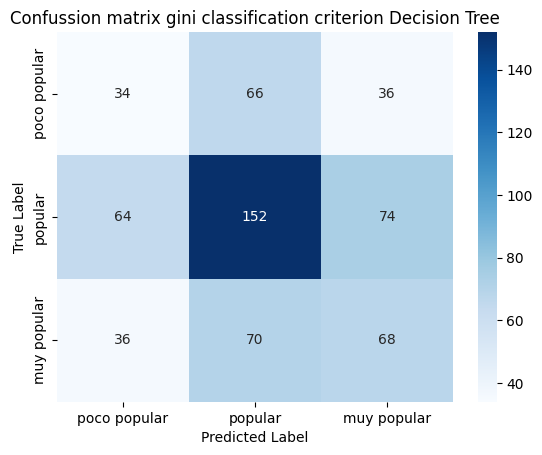

In [59]:
cm = confusion_matrix(y_test,pred1)
accuracy=accuracy_score(y_test,pred1)
precision =precision_score(y_test,pred1,average='micro')
recall =  recall_score(y_test,pred1,average='micro')
f1 = f1_score(y_test,pred1,average='micro')
print('Gini classification criterion Decision Tree')
print(f'Accuracy: {round(accuracy, 3)}')
print(f'Precision: {round(precision, 3)}')
print(f'recall: {round(recall, 3)}')
sb.heatmap(
  cm,
  annot=True,
  cmap="Blues",
  fmt="d",
  xticklabels=['poco popular', 'popular', 'muy popular'],
  yticklabels=['poco popular', 'popular', 'muy popular']
)
plt.title('Confussion matrix gini classification criterion Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

log loss classification criterion Decision Tree
Accuracy: 0.38
Precision: 0.38
recall: 0.38


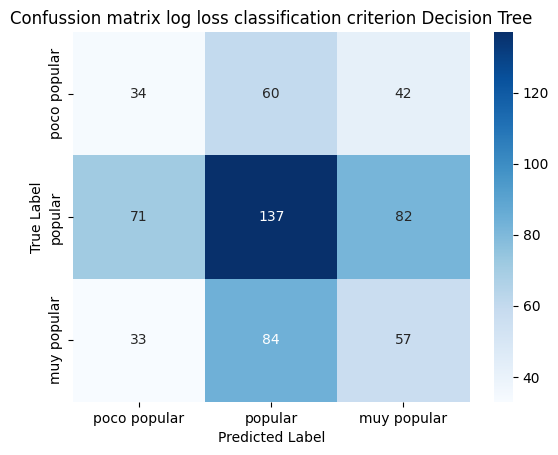

In [60]:
cm = confusion_matrix(y_test,pred2)
accuracy=accuracy_score(y_test,pred2)
precision =precision_score(y_test,pred2,average='micro')
recall =  recall_score(y_test,pred2,average='micro')
f1 = f1_score(y_test,pred2,average='micro')
print('log loss classification criterion Decision Tree')
print(f'Accuracy: {round(accuracy, 3)}')
print(f'Precision: {round(precision, 3)}')
print(f'recall: {round(recall, 3)}')
sb.heatmap(
  cm,
  annot=True,
  cmap="Blues",
  fmt="d",
  xticklabels=['poco popular', 'popular', 'muy popular'],
  yticklabels=['poco popular', 'popular', 'muy popular']
)
plt.title('Confussion matrix log loss classification criterion Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

entropy classification criterion Decision Tree
Accuracy: 0.395
Precision: 0.395
recall: 0.395


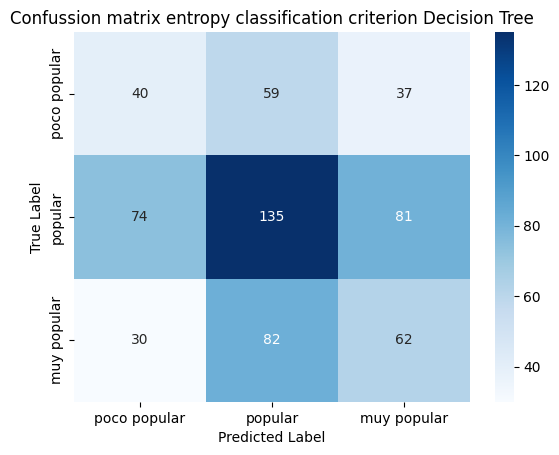

In [61]:
cm = confusion_matrix(y_test,pred3)
accuracy=accuracy_score(y_test,pred3)
precision =precision_score(y_test,pred3,average='micro')
recall =  recall_score(y_test,pred3,average='micro')
f1 = f1_score(y_test,pred3,average='micro')
print('entropy classification criterion Decision Tree')
print(f'Accuracy: {round(accuracy, 3)}')
print(f'Precision: {round(precision, 3)}')
print(f'recall: {round(recall, 3)}')
sb.heatmap(
  cm,
  annot=True,
  cmap="Blues",
  fmt="d",
  xticklabels=['poco popular', 'popular', 'muy popular'],
  yticklabels=['poco popular', 'popular', 'muy popular']
)
plt.title('Confussion matrix entropy classification criterion Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()